<a href="https://colab.research.google.com/github/tejaz10/embrio/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pytplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.pytplot'

In [25]:
data_path='/content/Cancer_data.csv'
df = pd.read_csv(data_path)
df.sample(6)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1492,66,1,19.484117,0,0,1.918732,0.726430,0,1
1471,46,0,34.593996,0,0,0.563819,3.294714,0,0
1391,57,0,16.060557,0,0,1.274081,1.566847,0,0
642,71,1,21.507171,1,0,7.901314,4.366957,1,1
777,78,1,38.876513,0,0,8.111046,4.126542,0,1
734,51,1,26.812334,0,0,5.031336,4.367778,0,1


In [38]:
df.shape

(1500, 9)

Text(0.5, 1.0, 'Diagnosis Frequency')

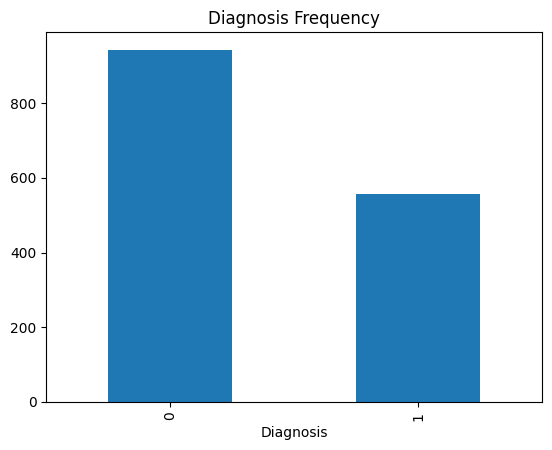

In [27]:
(df['Diagnosis'].value_counts().plot(kind='bar')).set_title('Diagnosis Frequency')

In [62]:
X = df.iloc[:, :8]
y = df['Diagnosis']


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [69]:
X_test

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
127,26,1,22.616978,0,1,5.270076,2.889385,0
528,70,1,20.969905,0,1,9.200382,3.047643,0
803,29,1,37.832174,0,2,9.314904,0.246368,1
1409,25,0,36.542273,0,0,4.047059,4.257422,0
727,55,1,30.016277,1,0,2.872577,3.711005,0
...,...,...,...,...,...,...,...,...
1255,49,0,39.003390,0,1,8.877515,4.960080,1
571,36,0,37.060409,0,0,7.254682,2.649169,0
663,39,0,35.122669,1,0,2.320786,3.803797,1
52,56,0,19.796683,0,0,3.525292,3.340097,0


In [88]:
ANN1 = models.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [89]:
ANN1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
history = ANN1.fit(X_train,y_train,epochs=7,validation_data=(X_test,y_test))

Epoch 1/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5741 - loss: 0.7432 - val_accuracy: 0.6433 - val_loss: 0.6358
Epoch 2/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6670 - loss: 0.6231 - val_accuracy: 0.6633 - val_loss: 0.6139
Epoch 3/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6994 - loss: 0.5966 - val_accuracy: 0.6767 - val_loss: 0.6050
Epoch 4/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6747 - loss: 0.5831 - val_accuracy: 0.7167 - val_loss: 0.5585
Epoch 5/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6880 - loss: 0.5834 - val_accuracy: 0.6900 - val_loss: 0.5816
Epoch 6/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7103 - loss: 0.5507 - val_accuracy: 0.7133 - val_loss: 0.5183
Epoch 7/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7547 - loss: 0.5071 - val_accuracy: 0.7200 - val_loss: 0.5057
